In [2]:
import pywt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [3]:
data = np.linspace(1, 10, 10)
print(data)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [4]:
# pywt.threshold(data, value, mode, substitute) mode 模式有4种，soft, hard, greater, less; substitute是替换值

# 将小于6 的值设置为12， 大于等于6 的值全部减去6
data_soft = pywt.threshold(data=data, value=6, mode='soft', substitute=12)
print(data_soft)


# 将小于6 的值设置为12， 其余的值不变
data_hard = pywt.threshold(data=data, value=6, mode='hard', substitute=12)
print(data_hard)


# 将小于6 的值设置为12，大于等于阈值的值不变化
data_greater = pywt.threshold(data, 6, 'greater', 12)
print(data_greater)


# 将大于6 的值设置为12， 小于等于阈值的值不变
data_less = pywt.threshold(data, 6, 'less', 12)
print(data_less)


[12. 12. 12. 12. 12.  0.  1.  2.  3.  4.]
[12. 12. 12. 12. 12.  6.  7.  8.  9. 10.]
[12. 12. 12. 12. 12.  6.  7.  8.  9. 10.]
[ 1.  2.  3.  4.  5.  6. 12. 12. 12. 12.]


# 在python中使用ecg心电信号进行小波去噪实验

In [5]:
import matplotlib.pyplot as plt
import pywt

# Get data:
ecg = pywt.data.ecg() # 生成心电信号
index = []
data = []
for i in range(len(ecg)-1):
    X = float(i)
    Y = float(ecg[i])
    index.append(X)
    data.append(Y)

maximum level is 6


<Figure size 432x288 with 0 Axes>

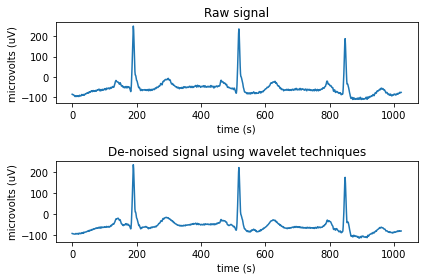

In [6]:
# Create wavelet object and define parameters

w = pywt.Wavelet('db8') # 选用Daubechies8小波
maxlev = pywt.dwt_max_level(len(data), w.dec_len)
print("maximum level is " + str(maxlev))

threshold = 0.04 # Threshold for filtering
# Decompose into wavelet components, to the level selected:
coeffs = pywt.wavedec(data, 'db8', level=maxlev) # 将信号进行小波分解
plt.figure()

for i in range(1, len(coeffs)):
    coeffs[i] = pywt.threshold(coeffs[i], threshold*max(coeffs[i])) # 将噪声滤波
    datarec = pywt.waverec(coeffs, 'db8') # 将信号进行小波重构
    mintime = 0
    maxtime = mintime + len(data) + 1

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(index[mintime:maxtime], data[mintime:maxtime])
plt.xlabel('time (s)')
plt.ylabel('microvolts (uV)')
plt.title("Raw signal")

plt.subplot(2, 1, 2)
plt.plot(index[mintime:maxtime], datarec[mintime:maxtime-1])
plt.xlabel('time (s)')
plt.ylabel('microvolts (uV)')
plt.title("De-noised signal using wavelet techniques")

plt.tight_layout()

plt.show()

# 多项式拟合

In [ ]:
X = np.array([1,2,3,4,5,6,7,8,9,10])
Y = 2*X+1

In [67]:
params_n = np.polyfit(X, Y, deg=1)
f = np.poly1d(params_n)
f_d1 = f.deriv(m=1)
d1_values = np.polyval(f_d1.coef, X)

print(f)
print(f_d1)
print(d1_values)

 
2 x + 1
 
2
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]


# R值计算

In [68]:
yfit = np.polyval(params_n, X)
Rsquare = np.corrcoef(Y, yfit)[0,1]**2
Rsquare

1.0

# 信噪比计算

In [70]:
# 原文链接：https://blog.csdn.net/weixin_43545253/article/details/113727709

import numpy as np
import math

def SNR_singlech(S, SN):
    """ 
        S: 纯信号
        SN:带噪信号
    """
    S = S-np.mean(S)# 消除直流分量
    S = S/np.max(np.abs(S))#幅值归一化
    mean_S = (np.sum(S))/(len(S))#纯信号的平均值
    PS = np.sum((S-mean_S)*(S-mean_S))
    PN = np.sum((S-SN)*(S-SN))
    snr=10*math.log((PS/PN), 10)
    return(snr)

In [71]:
snr = SNR_singlech(yfit, Y)
print('snr=', snr)

snr= -26.206091942316917
